In [2]:
import scanpy as sc
import numpy as np
import pandas as pd

In [4]:
h1d = sc.read_10x_h5('1H_filtered_feature_bc_matrix.h5')
h1d

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 7839 × 25627
    var: 'gene_ids', 'feature_types', 'genome'

In [8]:
h1d.var_names_make_unique()
h1d

AnnData object with n_obs × n_vars = 7839 × 25627
    var: 'gene_ids', 'feature_types', 'genome'

In [9]:
!pip install scvi-tools #doublet removal

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.5/351.5 KB 2.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 732.8/732.8 KB 7.9 MB/s eta 0:00:000:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.5 MB/s eta 0:00:000m eta 0:00:010:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 KB 7.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.3 MB/s eta 0:00:0031m12.1 MB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.

In [9]:
import scvi

/home/zia/.local/lib/python3.10/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/home/zia/.local/lib/python3.10/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (


In [14]:
h1d

AnnData object with n_obs × n_vars = 7839 × 2000
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'

In [11]:
sc.pp.filter_genes(h1d, min_cells = 10)

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [13]:
sc.pp.highly_variable_genes(h1d, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [18]:
!pip install scikit-misc

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 17.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [7]:
h1d.var

,gene_ids,feature_types,genome
ENSRNOG00000066169,ENSRNOG00000066169,Gene Expression,Rattus_norvegicus_genome
Olr56,ENSRNOG00000070168,Gene Expression,Rattus_norvegicus_genome
Irgq,ENSRNOG00000070901,Gene Expression,Rattus_norvegicus_genome
Doc2g,ENSRNOG00000018029,Gene Expression,Rattus_norvegicus_genome
Ceacam16,ENSRNOG00000031391,Gene Expression,Rattus_norvegicus_genome
...,...,...,...
ENSRNOG00000062442,ENSRNOG00000062442,Gene Expression,Rattus_norvegicus_genome
ENSRNOG00000070895,ENSRNOG00000070895,Gene Expression,Rattus_norvegicus_genome
ENSRNOG00000066963,ENSRNOG00000066963,Gene Expression,Rattus_norvegicus_genome
ENSRNOG00000069230,ENSRNOG00000069230,Gene Expression,Rattus_norvegicus_genome


In [15]:
scvi.model.SCVI.setup_anndata(h1d)
vae = scvi.model.SCVI(h1d)
vae.train()

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 400/400: 100%|█| 400/400 [11:58<00:00,  1.78s/it, v_num=1, train_loss_step

`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|█| 400/400 [11:58<00:00,  1.80s/it, v_num=1, train_loss_step


In [19]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/home/zia/.local/lib/python3.10/site-packages/anndata/_core/merge.py:217: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dtype):
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Epoch 347/400:  87%|▊| 347/400 [02:20<00:21,  2.47it/s, v_num=1, train_loss_step
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.277. Signaling Trainer to stop.


In [23]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df

,doublet,singlet,prediction
AAACCCAAGACGATAT-1,-0.856694,0.930564,singlet
AAACCCATCCATCTAT-1,-3.838778,4.144423,singlet
AAACCCATCCCATAAG-1,-3.342226,2.722646,singlet
AAACCCATCCGTATGA-1,-3.335105,2.914521,singlet
AAACCCATCCTCCACA-1,-1.287968,2.109509,singlet
...,...,...,...
TTTGTTGCAACCCTAA-1,1.248239,-0.768767,doublet
TTTGTTGCACACACGC-1,0.727337,-0.481465,doublet
TTTGTTGCAGTACTAC-1,-0.676441,0.949256,singlet
TTTGTTGGTAACCAGG-1,-1.035047,0.910650,singlet


In [24]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,1420,1420
singlet,6419,6419


In [25]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCAAGACGATAT-1,-0.856694,0.930564,singlet,-1.787258
AAACCCATCCATCTAT-1,-3.838778,4.144423,singlet,-7.983202
AAACCCATCCCATAAG-1,-3.342226,2.722646,singlet,-6.064871
AAACCCATCCGTATGA-1,-3.335105,2.914521,singlet,-6.249626
AAACCCATCCTCCACA-1,-1.287968,2.109509,singlet,-3.397477
...,...,...,...,...
TTTGTTGCAACCCTAA-1,1.248239,-0.768767,doublet,2.017005
TTTGTTGCACACACGC-1,0.727337,-0.481465,doublet,1.208802
TTTGTTGCAGTACTAC-1,-0.676441,0.949256,singlet,-1.625697
TTTGTTGGTAACCAGG-1,-1.035047,0.910650,singlet,-1.945698


In [26]:
import seaborn as sns

/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


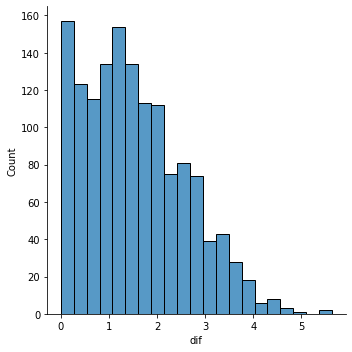

In [27]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [30]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
AAACCCATCGATAACC-1,1.110058,-0.573010,doublet,1.683068
AAACGCTAGCTTCATG-1,0.721930,-0.702134,doublet,1.424064
AAAGAACCACGCCAGT-1,1.887821,-1.381851,doublet,3.269672
AAAGAACGTGGAACAC-1,0.779549,-0.323378,doublet,1.102927
AAAGGATGTATCACGT-1,1.275071,-1.004090,doublet,2.279161
...,...,...,...,...
TTTGACTTCCATAGGT-1,1.463922,-0.988665,doublet,2.452587
TTTGGAGTCGTGGCGT-1,1.298097,-0.500948,doublet,1.799045
TTTGGTTCAGGATTCT-1,0.661384,-0.704748,doublet,1.366132
TTTGTTGCAACCCTAA-1,1.248239,-0.768767,doublet,2.017005


In [31]:
h1d

AnnData object with n_obs × n_vars = 7839 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [32]:
h1d

AnnData object with n_obs × n_vars = 7839 × 2000
    obs: '_scvi_batch', '_scvi_labels'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid'

In [33]:
h1d = sc.read_10x_h5('1H_filtered_feature_bc_matrix.h5')

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [35]:
h1d.var_names_make_unique()
h1d.obs

""
AAACCCAAGACGATAT-1
AAACCCATCCATCTAT-1
AAACCCATCCCATAAG-1
AAACCCATCCGTATGA-1
AAACCCATCCTCCACA-1
...
TTTGTTGCAACCCTAA-1
TTTGTTGCACACACGC-1
TTTGTTGCAGTACTAC-1
TTTGTTGGTAACCAGG-1


In [36]:
h1d.obs['doublet'] = h1d.obs.index.isin(doublets.index)

In [41]:
h1d.var

,gene_ids,feature_types,genome
ENSRNOG00000066169,ENSRNOG00000066169,Gene Expression,Rattus_norvegicus_genome
Olr56,ENSRNOG00000070168,Gene Expression,Rattus_norvegicus_genome
Irgq,ENSRNOG00000070901,Gene Expression,Rattus_norvegicus_genome
Doc2g,ENSRNOG00000018029,Gene Expression,Rattus_norvegicus_genome
Ceacam16,ENSRNOG00000031391,Gene Expression,Rattus_norvegicus_genome
...,...,...,...
ENSRNOG00000062442,ENSRNOG00000062442,Gene Expression,Rattus_norvegicus_genome
ENSRNOG00000070895,ENSRNOG00000070895,Gene Expression,Rattus_norvegicus_genome
ENSRNOG00000066963,ENSRNOG00000066963,Gene Expression,Rattus_norvegicus_genome
ENSRNOG00000069230,ENSRNOG00000069230,Gene Expression,Rattus_norvegicus_genome


In [38]:
h1d = h1d[~h1d.obs.doublet]

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [39]:
h1d

View of AnnData object with n_obs × n_vars = 6911 × 25627
    obs: 'doublet'
    var: 'gene_ids', 'feature_types', 'genome'

In [40]:
h1d.obs

,doublet
AAACCCAAGACGATAT-1,False
AAACCCATCCATCTAT-1,False
AAACCCATCCCATAAG-1,False
AAACCCATCCGTATGA-1,False
AAACCCATCCTCCACA-1,False
...,...
TTTGGTTGTTAAGAAC-1,False
TTTGTTGAGATGGGCT-1,False
TTTGTTGCAGTACTAC-1,False
TTTGTTGGTAACCAGG-1,False


In [42]:
h1d.var['mt'] = h1d.var.index.str.startswith('Mt-') #mitochondrial genes

/tmp/ipykernel_3330/2717077288.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  h1d.var['mt'] = h1d.var.index.str.startswith('Mt-') #mitochondrial genes


In [49]:
h1d.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
ENSRNOG00000066169,ENSRNOG00000066169,Gene Expression,Rattus_norvegicus_genome,False,22,0.003183,99.681667,22.0
Olr56,ENSRNOG00000070168,Gene Expression,Rattus_norvegicus_genome,False,0,0.000000,100.000000,0.0
Irgq,ENSRNOG00000070901,Gene Expression,Rattus_norvegicus_genome,False,273,0.041817,96.049776,289.0
Doc2g,ENSRNOG00000018029,Gene Expression,Rattus_norvegicus_genome,False,96,0.014470,98.610910,100.0
Ceacam16,ENSRNOG00000031391,Gene Expression,Rattus_norvegicus_genome,False,7,0.001158,99.898712,8.0
...,...,...,...,...,...,...,...,...
ENSRNOG00000062442,ENSRNOG00000062442,Gene Expression,Rattus_norvegicus_genome,False,114,0.017074,98.350456,118.0
ENSRNOG00000070895,ENSRNOG00000070895,Gene Expression,Rattus_norvegicus_genome,False,166,0.026045,97.598032,180.0
ENSRNOG00000066963,ENSRNOG00000066963,Gene Expression,Rattus_norvegicus_genome,False,1,0.000145,99.985530,1.0
ENSRNOG00000069230,ENSRNOG00000069230,Gene Expression,Rattus_norvegicus_genome,False,45,0.006656,99.348864,46.0


In [46]:
sc.pp.calculate_qc_metrics(h1d, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [50]:
h1d.var.sort_values('n_cells_by_counts') #many n_cells_by_counts' are '0', filterout those nuclei

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
Olr1611,ENSRNOG00000065899,Gene Expression,Rattus_norvegicus_genome,False,0,0.000000,100.000000,0.0
ENSRNOG00000030110,ENSRNOG00000030110,Gene Expression,Rattus_norvegicus_genome,False,0,0.000000,100.000000,0.0
Ang2,ENSRNOG00000025562,Gene Expression,Rattus_norvegicus_genome,False,0,0.000000,100.000000,0.0
ENSRNOG00000066425,ENSRNOG00000066425,Gene Expression,Rattus_norvegicus_genome,False,0,0.000000,100.000000,0.0
ENSRNOG00000063688,ENSRNOG00000063688,Gene Expression,Rattus_norvegicus_genome,False,0,0.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...
Anks1b,ENSRNOG00000024870,Gene Expression,Rattus_norvegicus_genome,False,6022,10.404572,12.863551,71906.0
Lsamp,ENSRNOG00000031852,Gene Expression,Rattus_norvegicus_genome,False,6108,29.567356,11.619158,204340.0
Ptprd,ENSRNOG00000005711,Gene Expression,Rattus_norvegicus_genome,False,6125,12.470120,11.373173,86181.0
Magi2,ENSRNOG00000013962,Gene Expression,Rattus_norvegicus_genome,False,6348,9.698307,8.146433,67025.0


In [51]:
sc.pp.filter_genes(h1d, min_cells=3) #filterout the genes which has at least in 3 nuclei

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [54]:
h1d.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
ENSRNOG00000066169,ENSRNOG00000066169,Gene Expression,Rattus_norvegicus_genome,False,22,0.003183,99.681667,22.0,22
Irgq,ENSRNOG00000070901,Gene Expression,Rattus_norvegicus_genome,False,273,0.041817,96.049776,289.0,273
Doc2g,ENSRNOG00000018029,Gene Expression,Rattus_norvegicus_genome,False,96,0.014470,98.610910,100.0,96
Ceacam16,ENSRNOG00000031391,Gene Expression,Rattus_norvegicus_genome,False,7,0.001158,99.898712,8.0,7
ENSRNOG00000064851,ENSRNOG00000064851,Gene Expression,Rattus_norvegicus_genome,False,8,0.001158,99.884243,8.0,8
...,...,...,...,...,...,...,...,...,...
ENSRNOG00000065062,ENSRNOG00000065062,Gene Expression,Rattus_norvegicus_genome,False,431,0.069744,93.763565,482.0,431
ENSRNOG00000062442,ENSRNOG00000062442,Gene Expression,Rattus_norvegicus_genome,False,114,0.017074,98.350456,118.0,114
ENSRNOG00000070895,ENSRNOG00000070895,Gene Expression,Rattus_norvegicus_genome,False,166,0.026045,97.598032,180.0,166
ENSRNOG00000069230,ENSRNOG00000069230,Gene Expression,Rattus_norvegicus_genome,False,45,0.006656,99.348864,46.0,45


In [55]:
h1d.var.sort_values('n_cells_by_counts')

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells
Gbp5,ENSRNOG00000032240,Gene Expression,Rattus_norvegicus_genome,False,3,0.000579,99.956591,4.0,3
Dll3,ENSRNOG00000019338,Gene Expression,Rattus_norvegicus_genome,False,3,0.000434,99.956591,3.0,3
RGD1306704,ENSRNOG00000064712,Gene Expression,Rattus_norvegicus_genome,False,3,0.000434,99.956591,3.0,3
ENSRNOG00000065515,ENSRNOG00000065515,Gene Expression,Rattus_norvegicus_genome,False,3,0.000434,99.956591,3.0,3
Klri1,ENSRNOG00000052803,Gene Expression,Rattus_norvegicus_genome,False,3,0.000434,99.956591,3.0,3
...,...,...,...,...,...,...,...,...,...
Anks1b,ENSRNOG00000024870,Gene Expression,Rattus_norvegicus_genome,False,6022,10.404572,12.863551,71906.0,6022
Lsamp,ENSRNOG00000031852,Gene Expression,Rattus_norvegicus_genome,False,6108,29.567356,11.619158,204340.0,6108
Ptprd,ENSRNOG00000005711,Gene Expression,Rattus_norvegicus_genome,False,6125,12.470120,11.373173,86181.0,6125
Magi2,ENSRNOG00000013962,Gene Expression,Rattus_norvegicus_genome,False,6348,9.698307,8.146433,67025.0,6348


In [59]:
h1d.obs.sort_values('total_counts')
h1d.obs.sort_values('n_genes_by_counts')

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,n_genes
GGTGGCTAGTGTAGAT-1,False,355,509.0,123.0,24.165030,355
TTTACGTGTATGATCC-1,False,365,532.0,0.0,0.000000,365
ACTTTCATCGGAACTT-1,False,381,523.0,2.0,0.382409,381
TCTATACCAACGGTAG-1,False,399,517.0,2.0,0.386847,399
GCATCGGAGGCCGCTT-1,False,401,604.0,0.0,0.000000,401
...,...,...,...,...,...,...
TCAGGGCAGGGTAGCT-1,False,5162,17738.0,13.0,0.073289,5161
CCAATTTTCTCATTAC-1,False,5175,16652.0,7.0,0.042037,5171
TTCAATCCACGAGGTA-1,False,5214,19466.0,7.0,0.035960,5212
TGATTCTGTACTGACT-1,False,5376,21604.0,13.0,0.060174,5376


In [58]:
sc.pp.filter_cells(h1d, min_genes=200)

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.

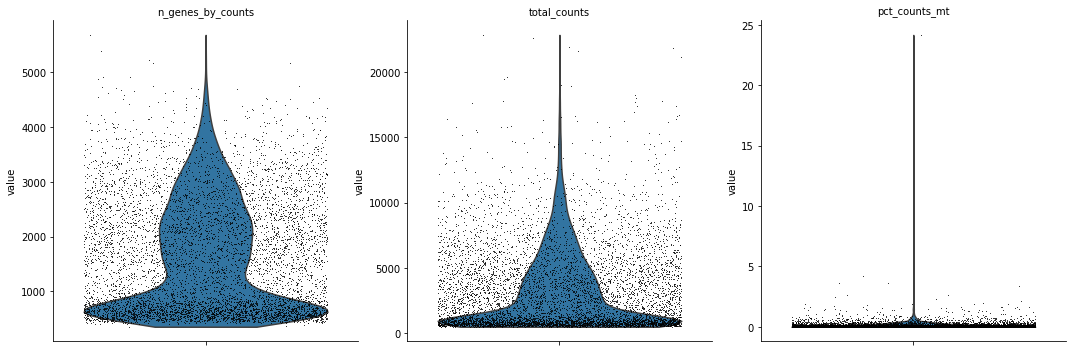

In [60]:
sc.pl.violin(h1d, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

In [61]:
upper_lim = np.quantile(h1d.obs.n_genes_by_counts.values, .98) # I did not filter out any 

In [62]:
upper_lim

3873.4000000000005

In [63]:
sc.pp.normalize_total(h1d, target_sum=1e4) #normalize every cell to 10,000 UMI

In [64]:
sc.pp.log1p(h1d) #change to log counts

In [65]:
h1d.X.sum(axis = 1)

matrix([[1964.1083],
        [1570.2755],
        [1725.6432],
        ...,
        [3737.2458],
        [3372.4878],
        [3736.9001]], dtype=float32)

In [ ]:
#Set the .raw attribute of the AnnData object to the normalized and logarithmized raw gene expression for later use in differential testing and visualizations of gene expression. This simply freezes the state of the AnnData object.
#You can get back an AnnData of the object in .raw by calling .raw.to_adata().


In [66]:
h1d.raw = h1d #save in the raw data

In [67]:
h1d.raw

In [72]:
sc.pp.highly_variable_genes(h1d, n_top_genes = 2000)

/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:215: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


In [73]:
h1d.var

,gene_ids,feature_types,genome,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,highly_variable,means,dispersions,dispersions_norm
ENSRNOG00000066169,ENSRNOG00000066169,Gene Expression,Rattus_norvegicus_genome,False,22,0.003183,99.681667,22.0,22,False,0.007021,1.147803,-1.362410
Irgq,ENSRNOG00000070901,Gene Expression,Rattus_norvegicus_genome,False,273,0.041817,96.049776,289.0,273,False,0.144125,2.073580,0.385466
Doc2g,ENSRNOG00000018029,Gene Expression,Rattus_norvegicus_genome,False,96,0.014470,98.610910,100.0,96,False,0.036437,1.596505,-0.515255
Ceacam16,ENSRNOG00000031391,Gene Expression,Rattus_norvegicus_genome,False,7,0.001158,99.898712,8.0,7,False,0.002104,0.890757,-1.847716
ENSRNOG00000064851,ENSRNOG00000064851,Gene Expression,Rattus_norvegicus_genome,False,8,0.001158,99.884243,8.0,8,False,0.005794,2.234038,0.688413
...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSRNOG00000065062,ENSRNOG00000065062,Gene Expression,Rattus_norvegicus_genome,False,431,0.069744,93.763565,482.0,431,False,0.144552,1.667010,-0.382143
ENSRNOG00000062442,ENSRNOG00000062442,Gene Expression,Rattus_norvegicus_genome,False,114,0.017074,98.350456,118.0,114,False,0.050122,2.058569,0.357125
ENSRNOG00000070895,ENSRNOG00000070895,Gene Expression,Rattus_norvegicus_genome,False,166,0.026045,97.598032,180.0,166,False,0.057475,1.705322,-0.309808
ENSRNOG00000069230,ENSRNOG00000069230,Gene Expression,Rattus_norvegicus_genome,False,45,0.006656,99.348864,46.0,45,False,0.028923,2.231563,0.683740


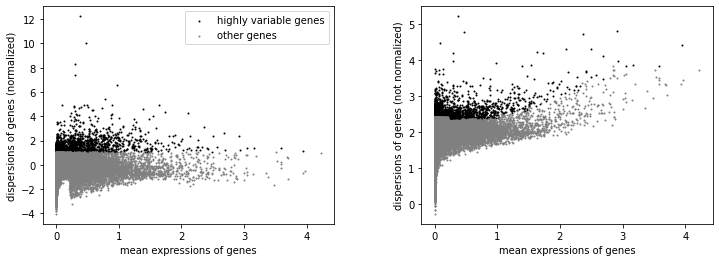

In [74]:
sc.pl.highly_variable_genes(h1d)

In [75]:
h1d = h1d[:, h1d.var.highly_variable]

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [77]:
sc.pp.regress_out(h1d, ['total_counts', 'pct_counts_mt'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:619: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if keys[0] in adata.obs_keys() and is_categorical_dtype(adata.obs[keys[0]]):


In [78]:
sc.pp.scale(h1d, max_value=10)

In [79]:
sc.tl.pca(h1d, svd_solver='arpack')

/home/zia/.local/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


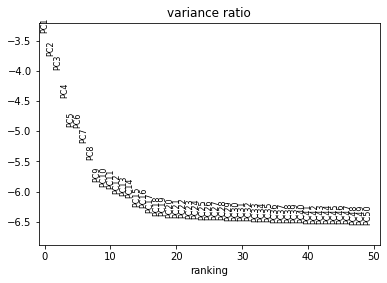

In [80]:
sc.pl.pca_variance_ratio(h1d, log=True, n_pcs = 50)

In [81]:
sc.pp.neighbors(h1d, n_pcs=21)

/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/zia/.local/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopyth

In [82]:
sc.tl.umap(h1d)

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  cax = scatter(


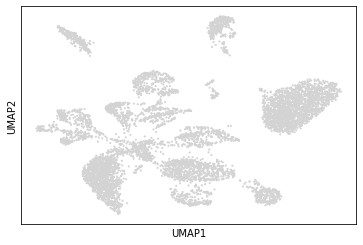

In [83]:
sc.pl.umap(h1d)

In [84]:
sc.tl.leiden(h1d)

ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

In [86]:
!pip install leidenalg

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 20.7 MB/s eta 0:00:00m eta 0:00:010:00:01


In [95]:
sc.tl.leiden(h1d, resolution = 0.5)
sc.tl.leiden(h1d, resolution = 1)
sc.tl.leiden(h1d)

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


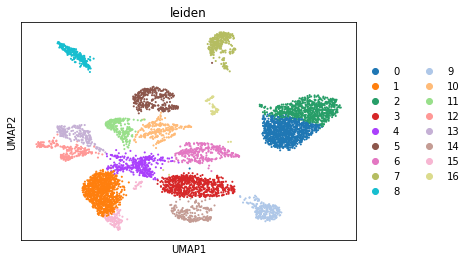

In [96]:
sc.pl.umap(h1d, color=['leiden'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will b

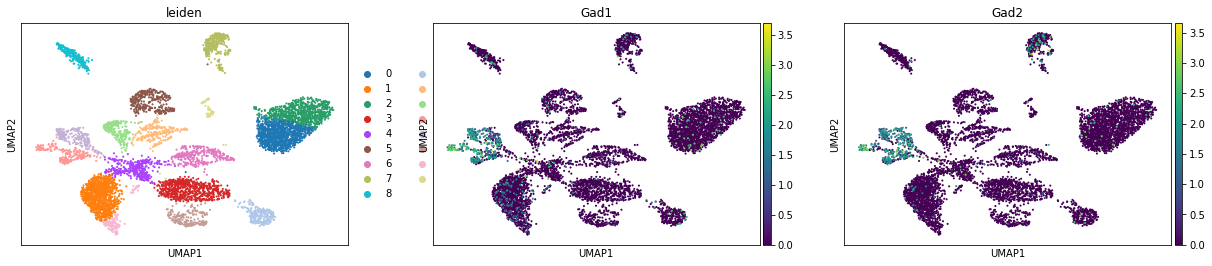

In [97]:
sc.pl.umap(h1d, color=['leiden', 'Gad1', 'Gad2'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


KeyError: 'Ctip2'

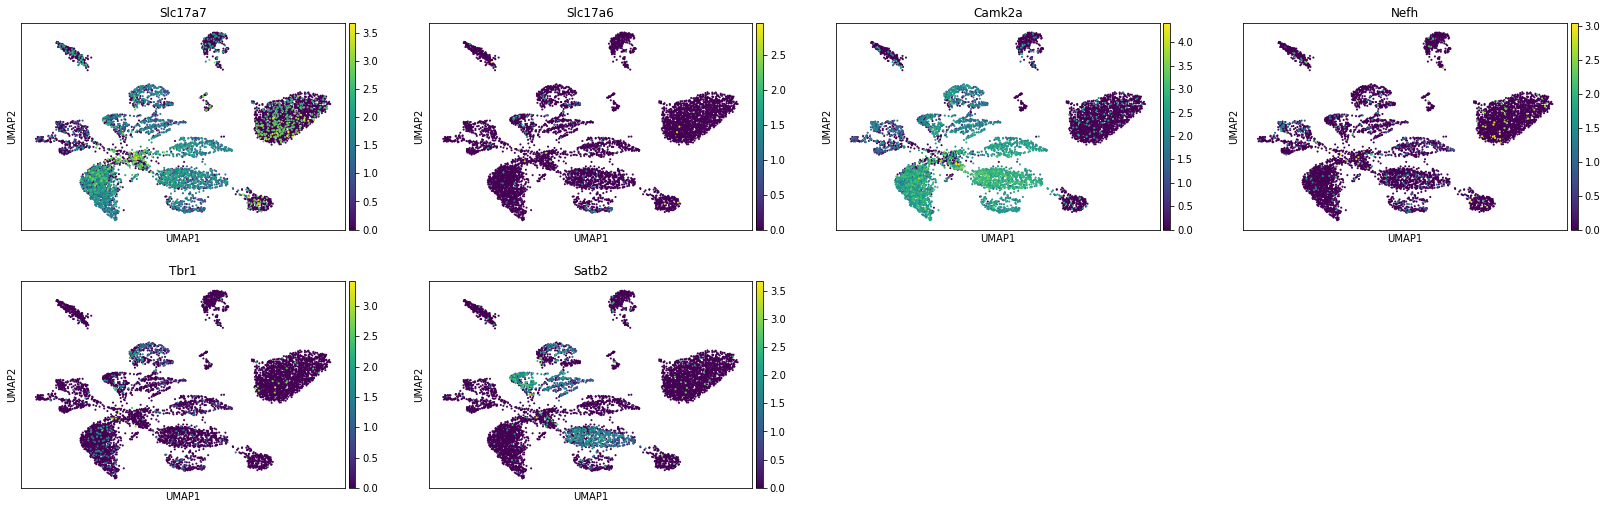

In [98]:
sc.pl.umap(h1d, color=['Slc17a7', 'Slc17a6', 'Camk2a', 'Nefh', 'Tbr1', 'Satb2', 'Ctip2', 'Rorb', 'Brn2', 'Nrgn', 'Syt1', 'Calb2'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


KeyError: 'Pv'

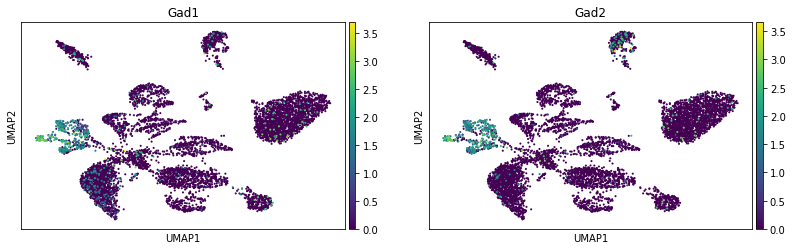

In [99]:
sc.pl.umap(h1d, color=['Gad1', 'Gad2', 'Pv', 'Sst', 'Vip', 'Calb1', 'Nos1', 'Npy', 'Cck', 'Th', 'Pax6', 'Calr'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


KeyError: 'Cd45'

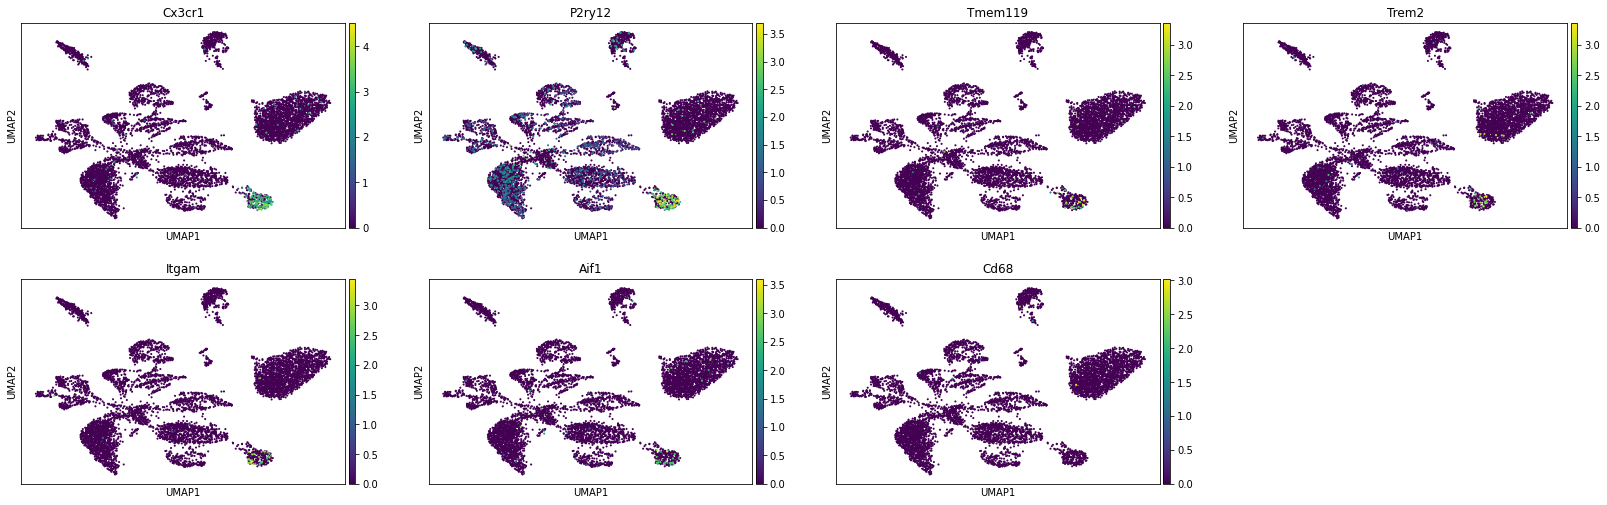

In [100]:
sc.pl.umap(h1d, color=['Cx3cr1', 'P2ry12', 'Tmem119', 'Trem2', 'Itgam', 'Aif1', 'Cd68', 'Cd45', 'C1qa', 'C1qb', 'C1qc', 'Csf1r', 'Marco', 'Cd11c'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


KeyError: 'Acsa-2'

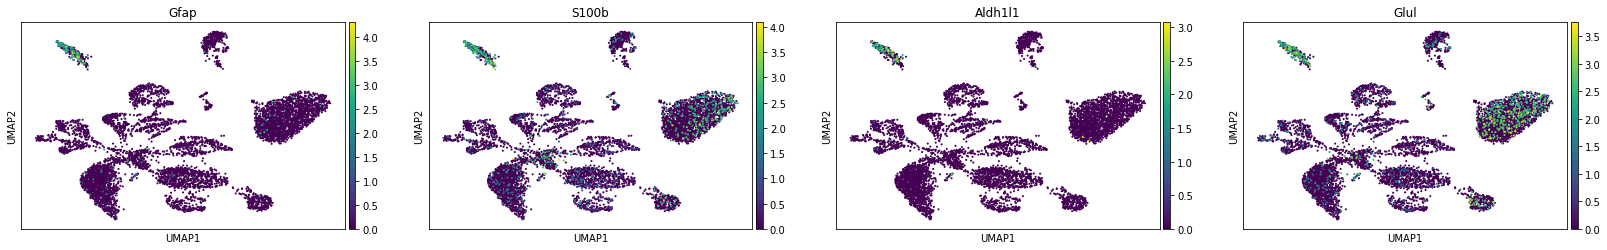

In [101]:
sc.pl.umap(h1d, color=['Gfap', 'S100b', 'Aldh1l1', 'Glul', 'Acsa-2', 'Sox9', 'Cd44', 'Aqp4', 'Kir4.1', 'Pdgfra', 'Glt-1'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


KeyError: 'Maguk'

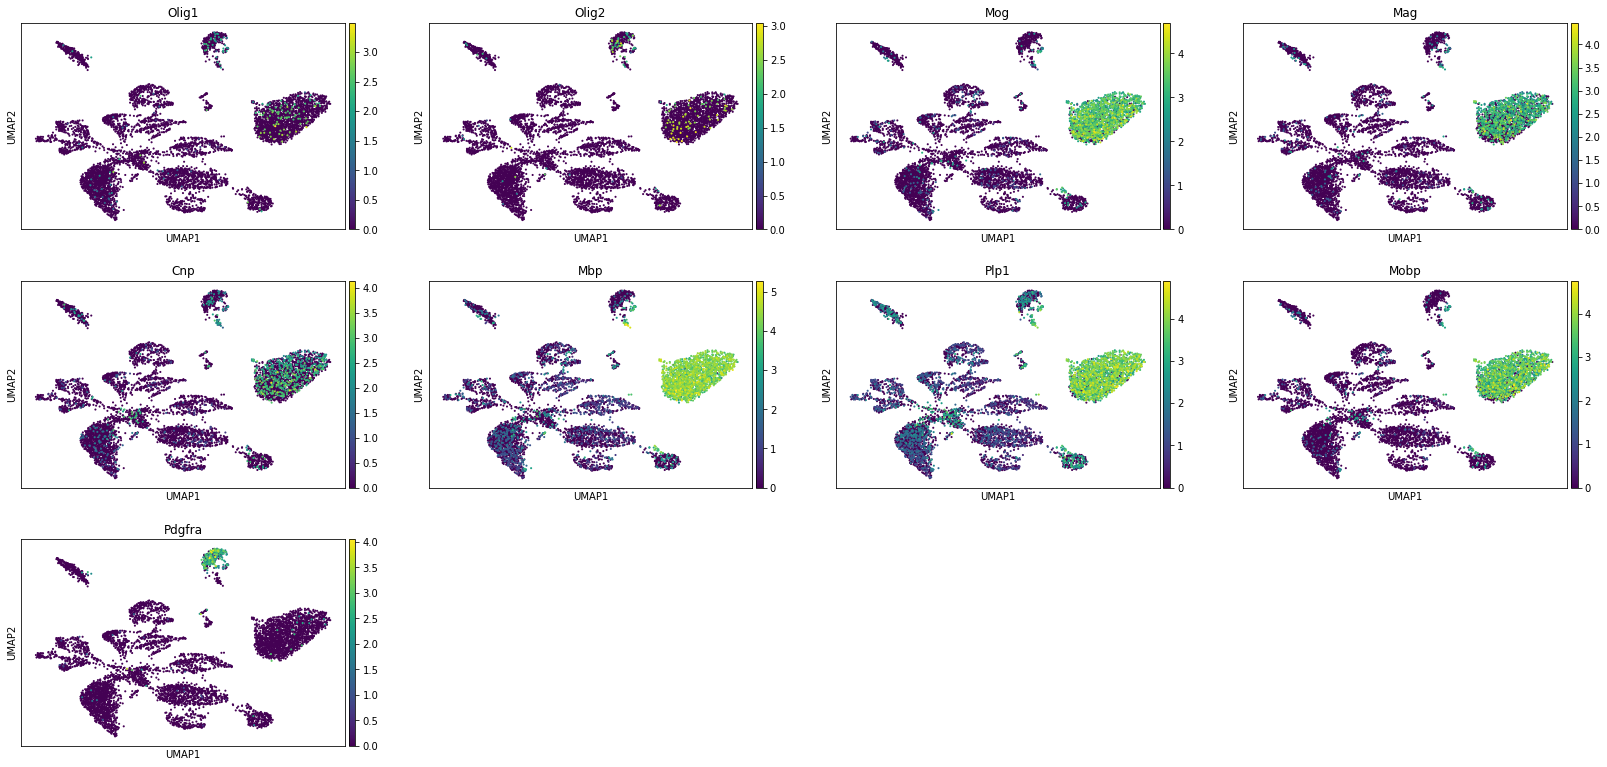

In [102]:
sc.pl.umap(h1d, color=['Olig1', 'Olig2', 'Mog', 'Mag', 'Cnp', 'Mbp', 'Plp1', 'Mobp', 'Pdgfra', 'Maguk', 'Opalin', 'Pdgfrb'])

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


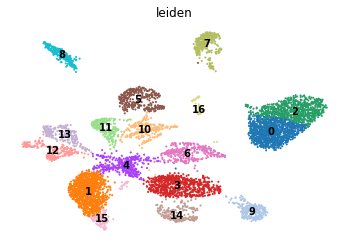

In [103]:
sc.pl.umap(h1d, color = ['leiden'], frameon = False, legend_loc = "on data")

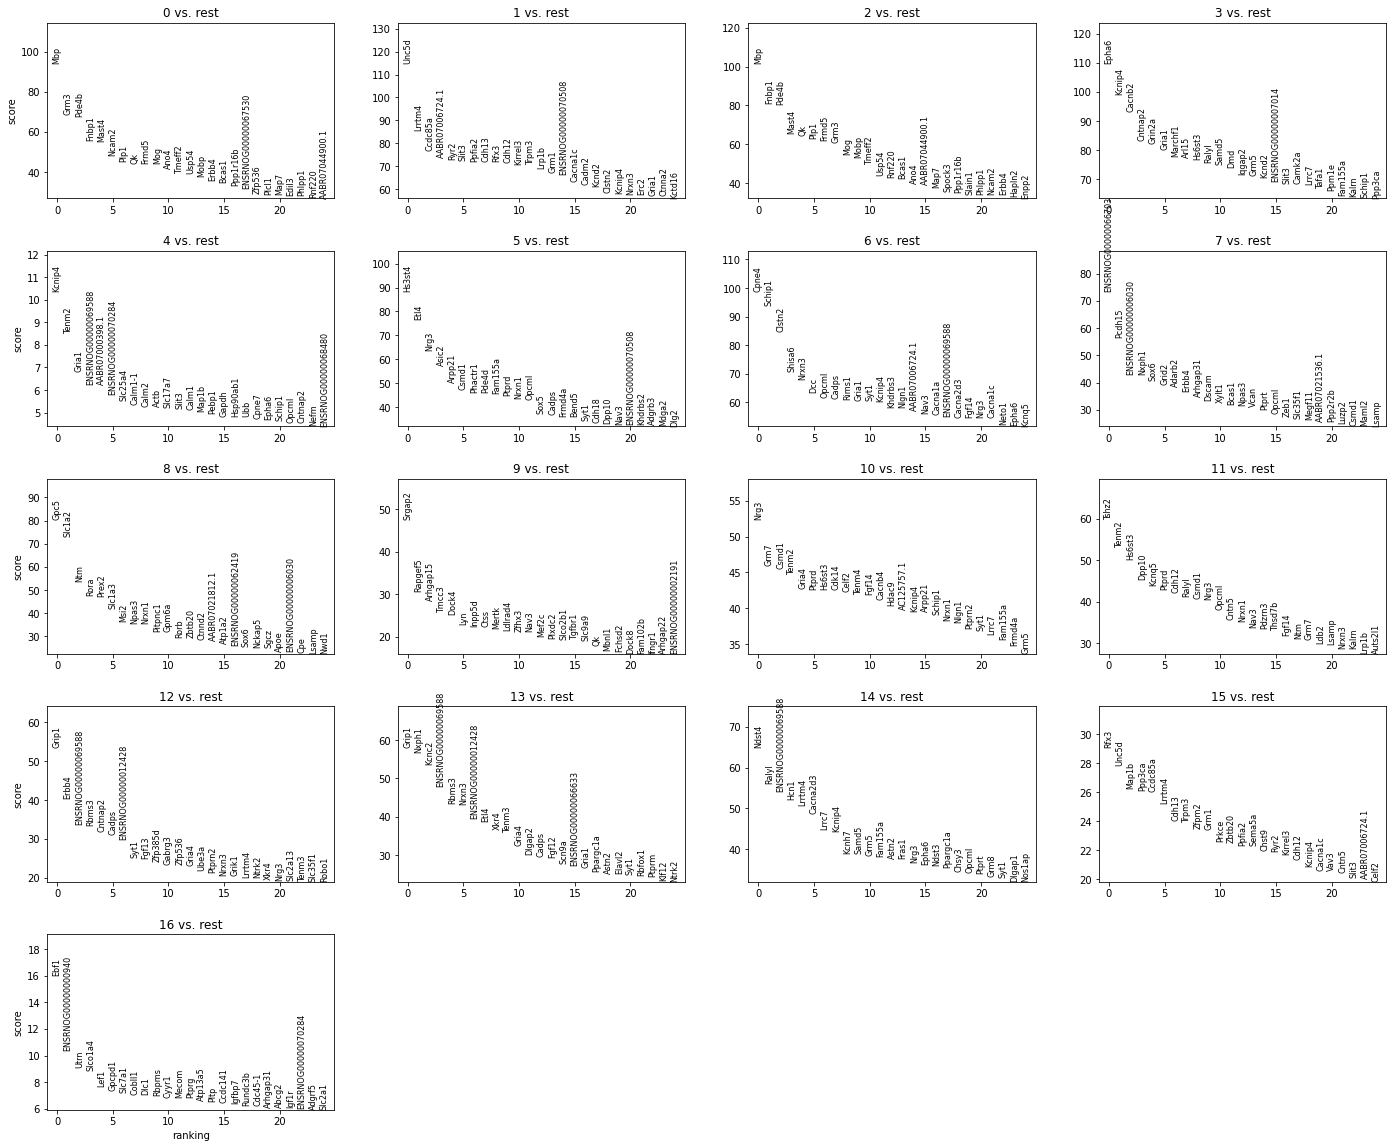

In [104]:
sc.tl.rank_genes_groups(h1d, 'leiden', method='t-test')
sc.pl.rank_genes_groups(h1d, n_genes=25, sharey=False)

/home/zia/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


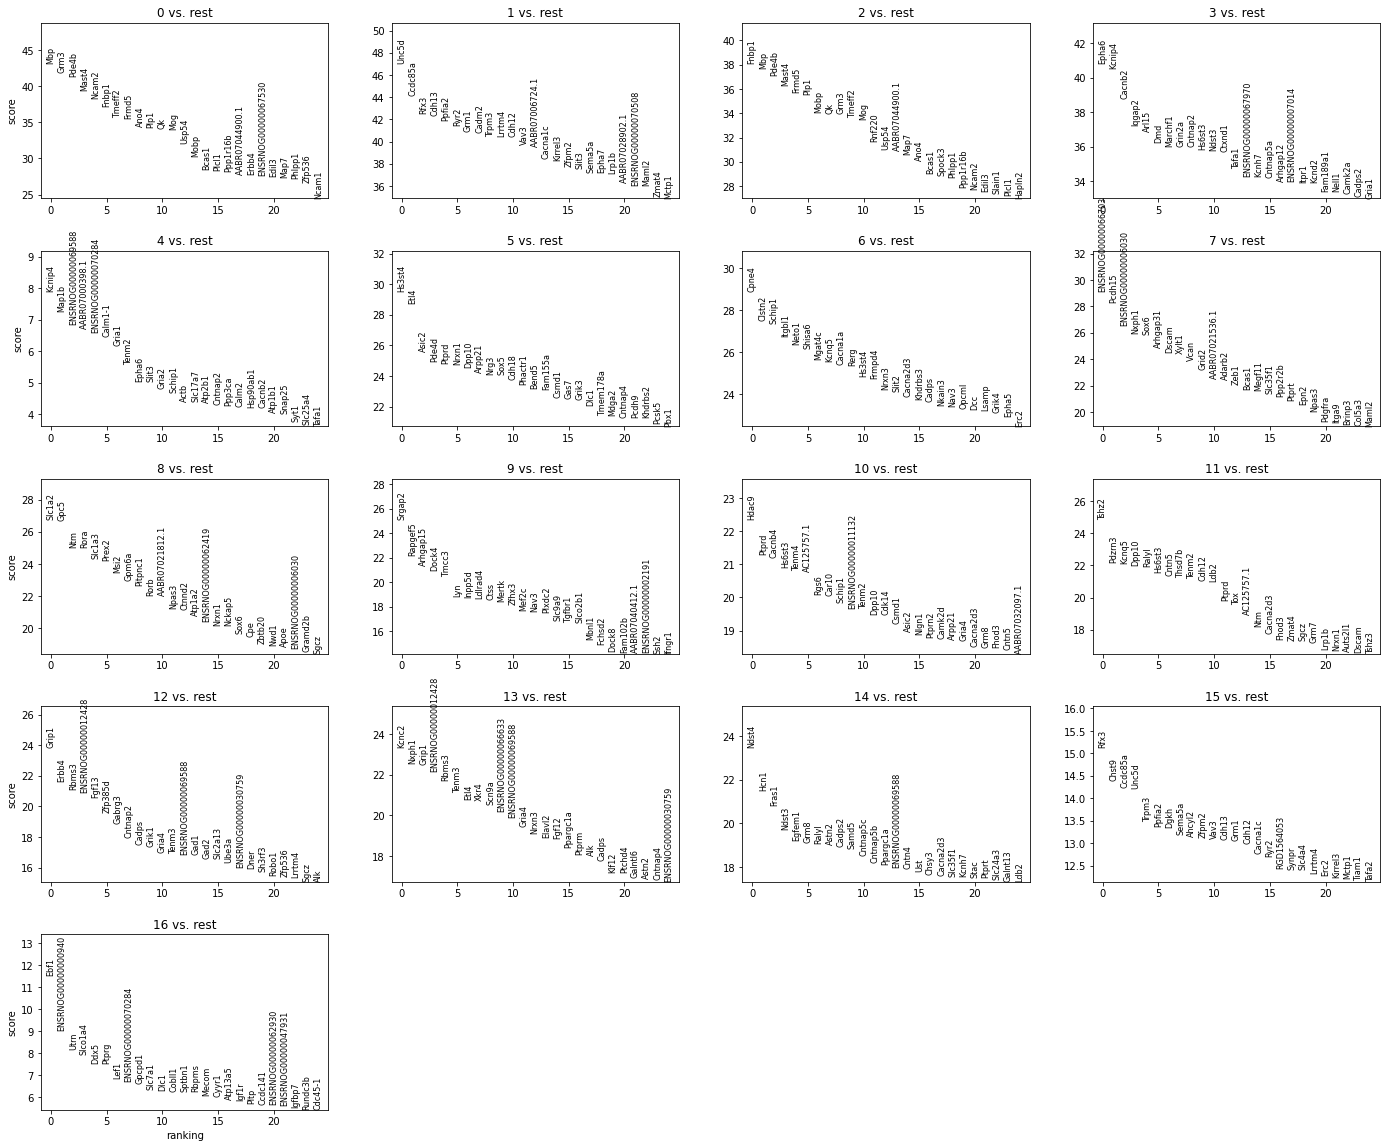

In [105]:
sc.tl.rank_genes_groups(h1d, 'leiden', method='wilcoxon')
sc.pl.rank_genes_groups(h1d, n_genes=25, sharey=False)

/home/zia/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


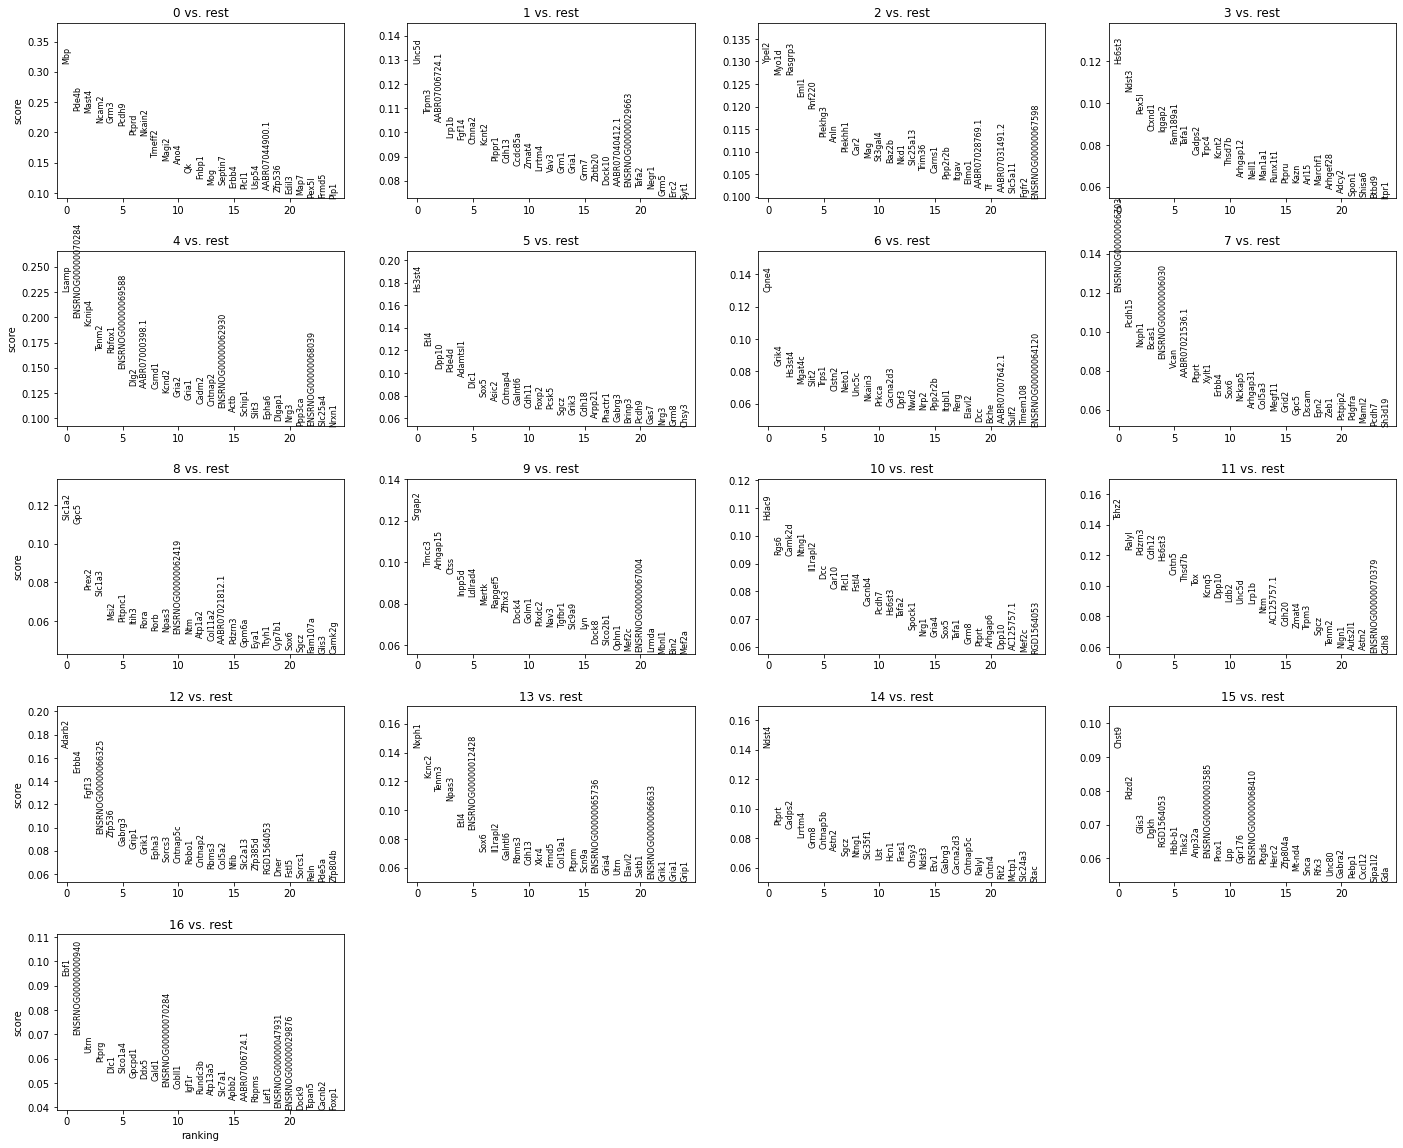

In [106]:
sc.tl.rank_genes_groups(h1d, 'leiden', method='logreg')
sc.pl.rank_genes_groups(h1d, n_genes=25, sharey=False)

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

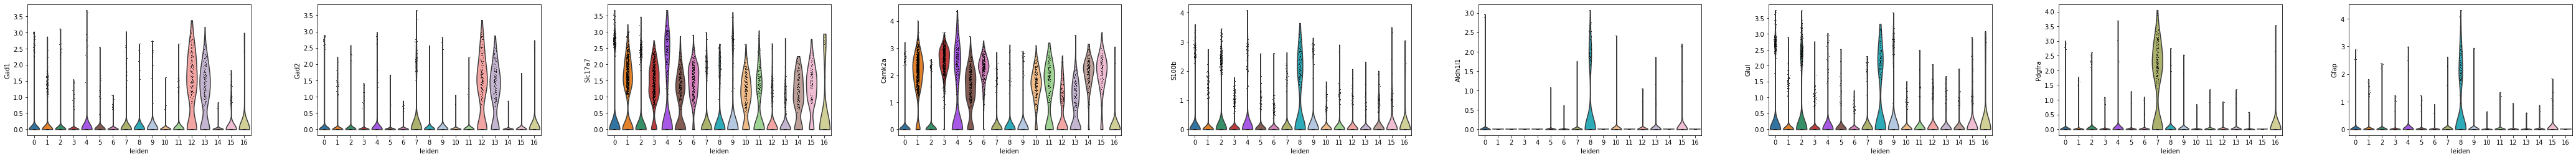

In [107]:
sc.pl.violin(h1d, ['Gad1', 'Gad2', 'Slc17a7','Camk2a', 'S100b', 'Aldh1l1', 'Glul', 'Pdgfra', 'Gfap'], groupby='leiden')

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

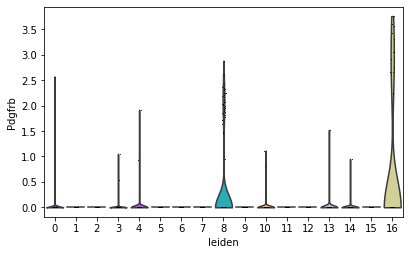

In [108]:
sc.pl.violin(h1d, ['Pdgfrb'], groupby='leiden')

/home/zia/.local/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:770: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[groupby]):
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/zia/.local/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/home/zia/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated a

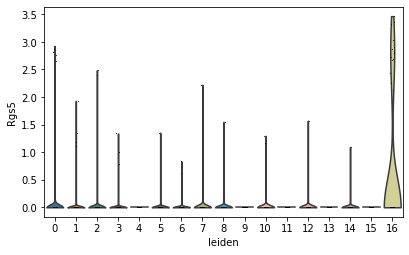

In [115]:
sc.pl.violin(h1d, ['Rgs5'], groupby='leiden')

In [119]:
import os

In [124]:
os.listdir('.h5/')

FileNotFoundError: [Errno 2] No such file or directory: '.h5/'

In [125]:
ls

10H_filtered_feature_bc_matrix.h5  28H_filtered_feature_bc_matrix.h5
11H_filtered_feature_bc_matrix.h5  29H_filtered_feature_bc_matrix.h5
13H_filtered_feature_bc_matrix.h5  2H_filtered_feature_bc_matrix.h5
14H_filtered_feature_bc_matrix.h5  30H_filtered_feature_bc_matrix.h5
15H_filtered_feature_bc_matrix.h5  31H_filtered_feature_bc_matrix.h5
16H_filtered_feature_bc_matrix.h5  32H_filtered_feature_bc_matrix.h5
17H_filtered_feature_bc_matrix.h5  33H_filtered_feature_bc_matrix.h5
18H_filtered_feature_bc_matrix.h5  34H_filtered_feature_bc_matrix.h5
19H_filtered_feature_bc_matrix.h5  35H_filtered_feature_bc_matrix.h5
1H_filtered_feature_bc_matrix.h5   36H_filtered_feature_bc_matrix.h5
20H_filtered_feature_bc_matrix.h5  3H_filtered_feature_bc_matrix.h5
21H_filtered_feature_bc_matrix.h5  4H_filtered_feature_bc_matrix.h5
22H_filtered_feature_bc_matrix.h5  5H_filtered_feature_bc_matrix.h5
23H_filtered_feature_bc_matrix.h5  6H_filtered_feature_bc_matrix.h5
24H_filtered_feature_bc_matrix.h5  7H_f